In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# The link to the dataset: https://www.kaggle.com/datasets/cloudymts/mobile-addiction-data

In [46]:
df = pd.read_csv('mobile_addiction.csv',encoding='utf-8')

# Knowing The Data

In [47]:
#know the shape of the data
print(df.shape)

(13589, 12)


In [48]:
#know the data types of the coulumns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          13589 non-null  int64 
 1   daily_screen_time   13589 non-null  int64 
 2   app_sessions        13589 non-null  int64 
 3   social_media_usage  13589 non-null  int64 
 4   gaming_time         13589 non-null  int64 
 5   notifications       13589 non-null  int64 
 6   night_usage         13589 non-null  int64 
 7   age                 13589 non-null  int64 
 8   work_study_hours    13589 non-null  int64 
 9   stress_level        13589 non-null  int64 
 10  apps_installed      13589 non-null  int64 
 11  addicted            13589 non-null  object
dtypes: int64(11), object(1)
memory usage: 1.2+ MB
None


In [49]:
#take a look of the data
df.head()

,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,0,2,29,0,0,49,0,44,5,3,35,not addicted
1,1,6,29,1,2,65,1,29,5,9,21,addicted
2,2,9,28,2,0,57,3,28,7,5,39,addicted
3,3,6,39,2,0,69,1,28,6,8,24,addicted
4,4,5,37,3,1,64,2,27,4,5,26,addicted


In [50]:
#descriing numerical values
df.describe()

,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000
mean,6794.000000,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048
std,3922.950739,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790
min,0.000000,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000
25%,3397.000000,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000
50%,6794.000000,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000
75%,10191.000000,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000
max,13588.000000,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000


In [51]:
#descriing categorical values
df.describe(include='object')

,addicted
count,13589
unique,2
top,addicted
freq,6846


In [52]:
#to get columns names
df.columns

Index(['Unnamed: 0', 'daily_screen_time', 'app_sessions', 'social_media_usage',
       'gaming_time', 'notifications', 'night_usage', 'age',
       'work_study_hours', 'stress_level', 'apps_installed', 'addicted'],
      dtype='object')

In [53]:
df['addicted'].value_counts()

addicted
addicted        6846
not addicted    6743
Name: count, dtype: int64

*The data is balanced*

In [54]:
#Check for null values
print(df.isnull().sum())

Unnamed: 0            0
daily_screen_time     0
app_sessions          0
social_media_usage    0
gaming_time           0
notifications         0
night_usage           0
age                   0
work_study_hours      0
stress_level          0
apps_installed        0
addicted              0
dtype: int64


*No null cells*

In [55]:
# Drop unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

In [56]:
#to get columns names
df.columns

Index(['daily_screen_time', 'app_sessions', 'social_media_usage',
       'gaming_time', 'notifications', 'night_usage', 'age',
       'work_study_hours', 'stress_level', 'apps_installed', 'addicted'],
      dtype='object')

In [57]:
#to show outliers for all numerical columns
for column in df.select_dtypes(include=['number']).columns:
	fig = px.box(df, x=column, title= f'Box plot for {column}')
	fig.show()


*Almost there is no outliers in this data set*

In [58]:
features = [
    'daily_screen_time', 'app_sessions', 'social_media_usage',
    'gaming_time', 'notifications', 'night_usage', 'age',
    'work_study_hours', 'stress_level', 'apps_installed'
]

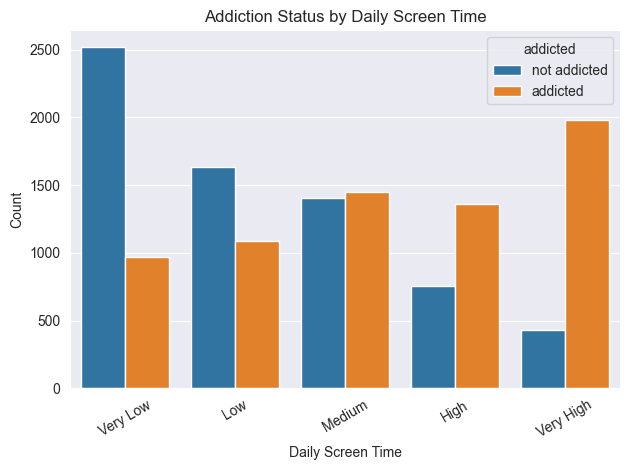

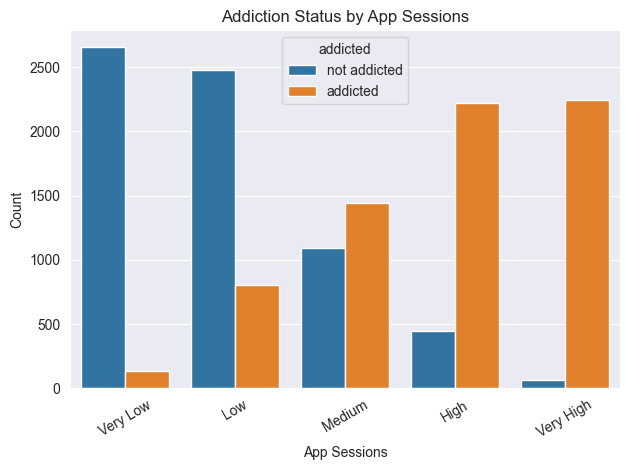

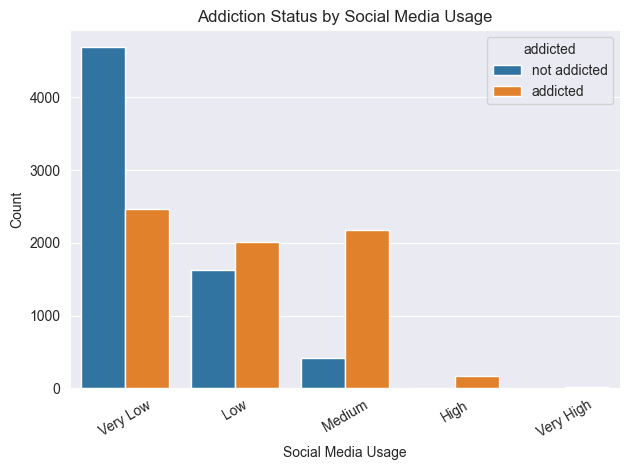

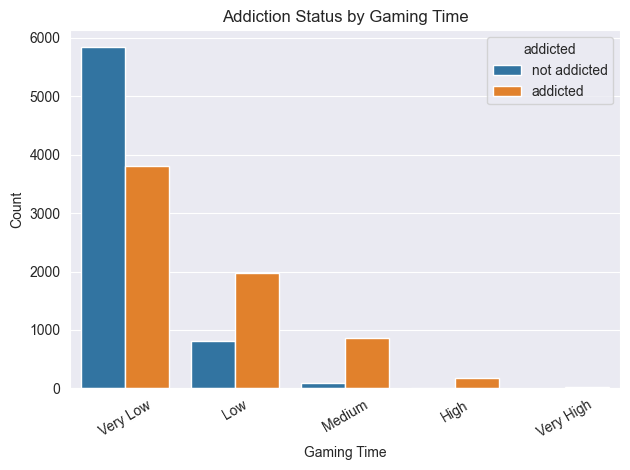

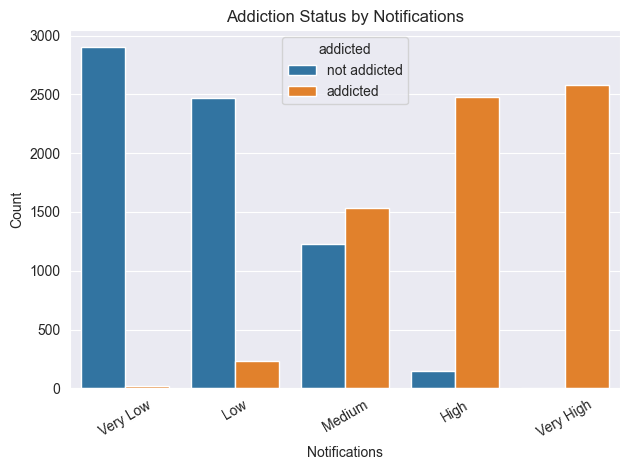

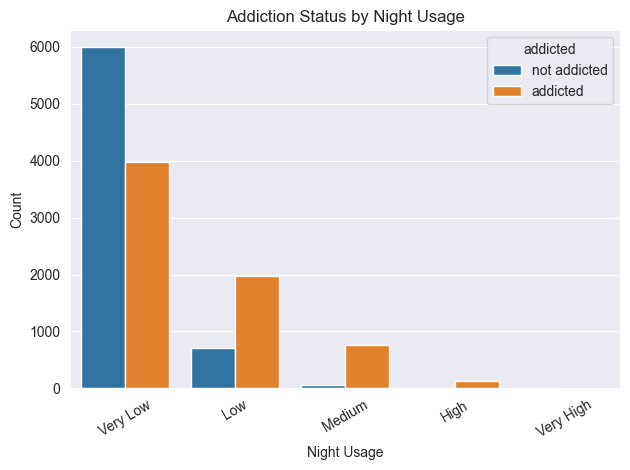

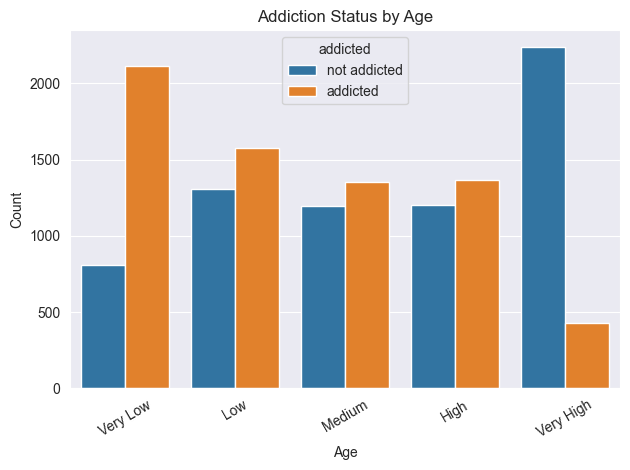

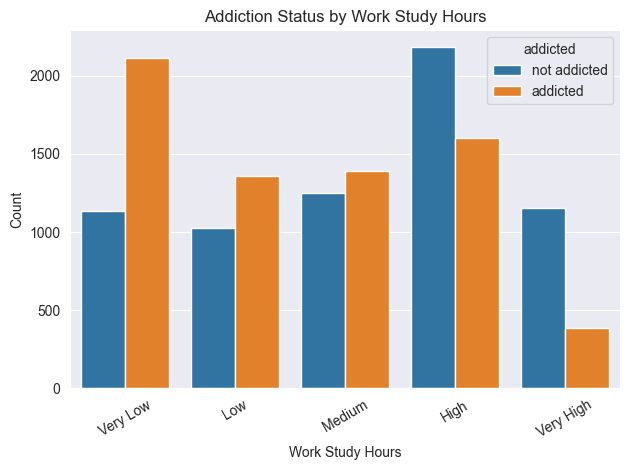

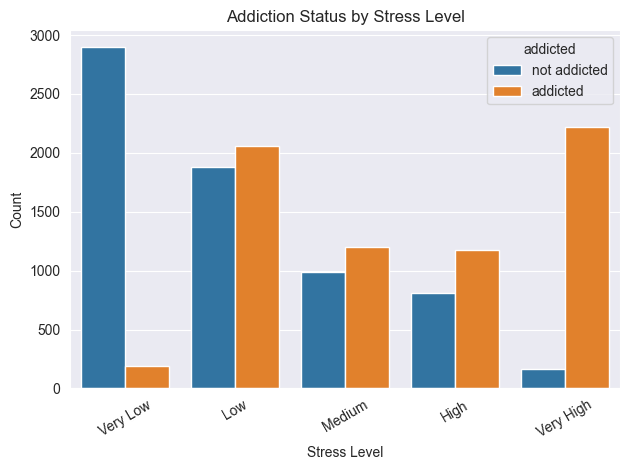

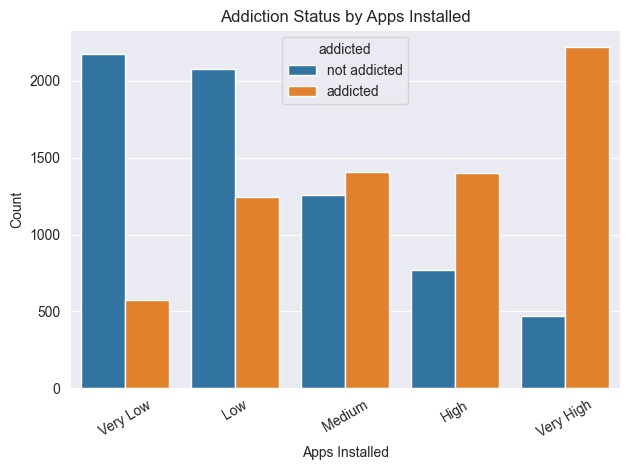

In [59]:
for feature in features:
    binned_col = f'{feature}_binned'

    try:
        unique_vals = df[feature].nunique()

        # Use qcut for features with many unique values
        if unique_vals >= 10:
            bin_edges = pd.qcut(df[feature], q=5, retbins=True, duplicates='drop')[1]
            num_bins = len(bin_edges) - 1
            labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'][:num_bins]
            df[binned_col] = pd.qcut(df[feature], q=num_bins, labels=labels)
        else:
            # Fallback: cut into equal-width bins
            df[binned_col] = pd.cut(df[feature], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

        # Plot
        sns.countplot(x=binned_col, hue='addicted', data=df)
        plt.title(f'Addiction Status by {feature.replace("_", " ").title()}')
        plt.xlabel(feature.replace('_', ' ').title())
        plt.ylabel('Count')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Skipping {feature} due to error: {e}")

I noticed that in the social media, gaming time, and night usage, when the time increased I got fewer addicted persons so I decided to calculate the proportions within each bin instead of count


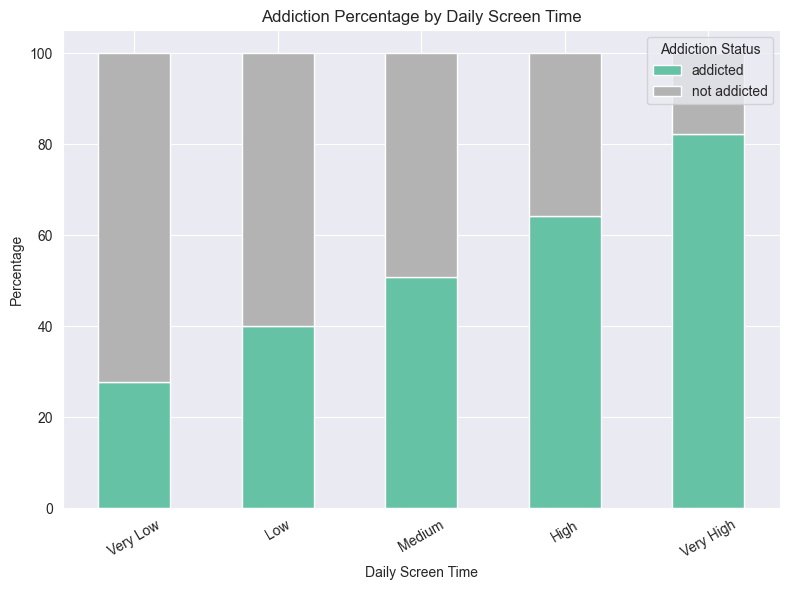

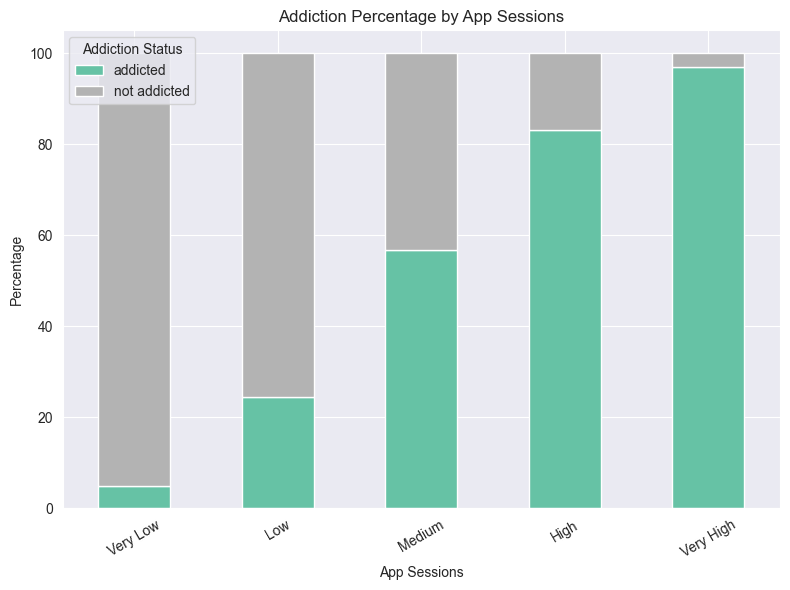

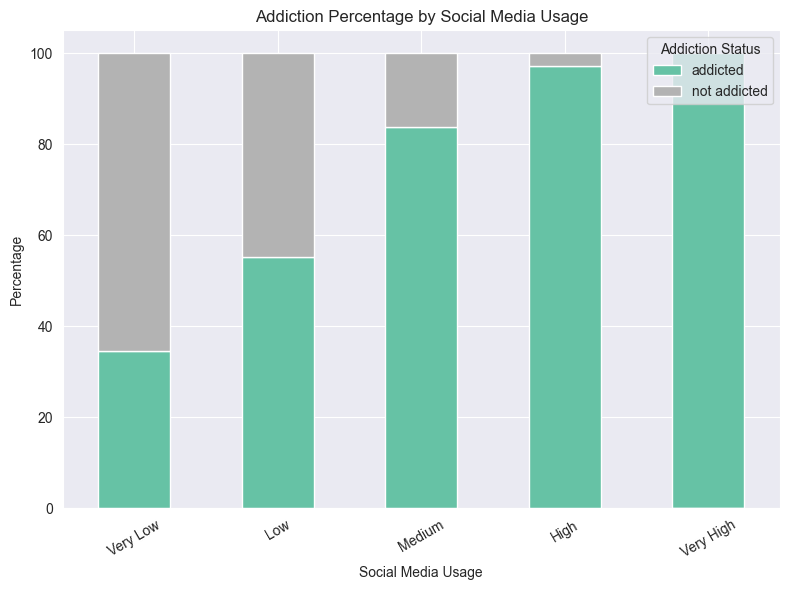

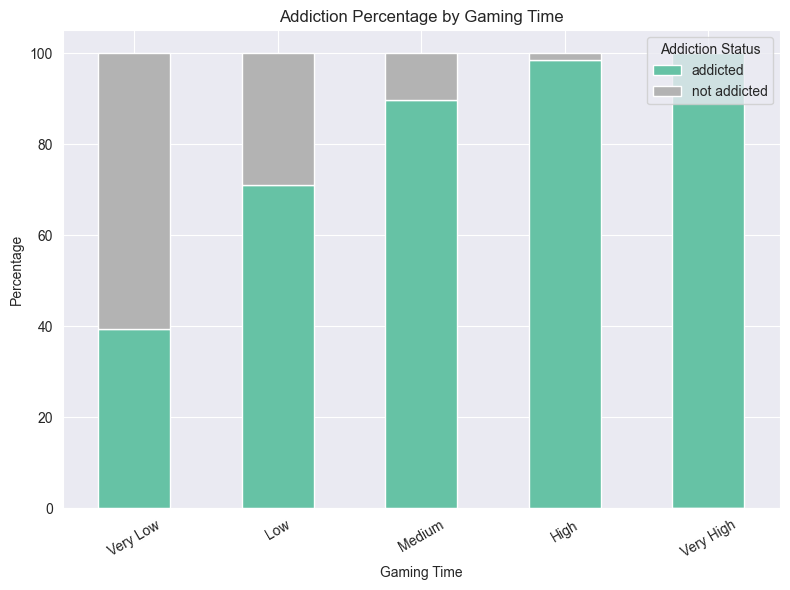

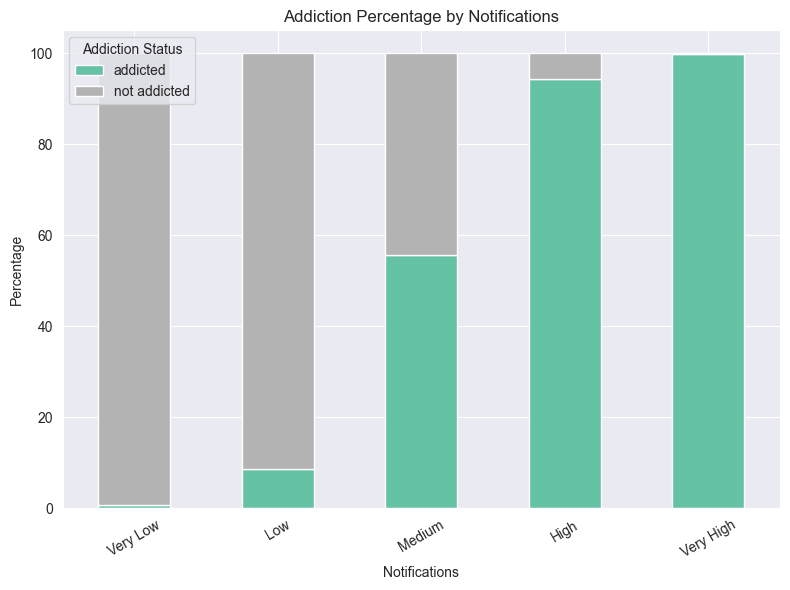

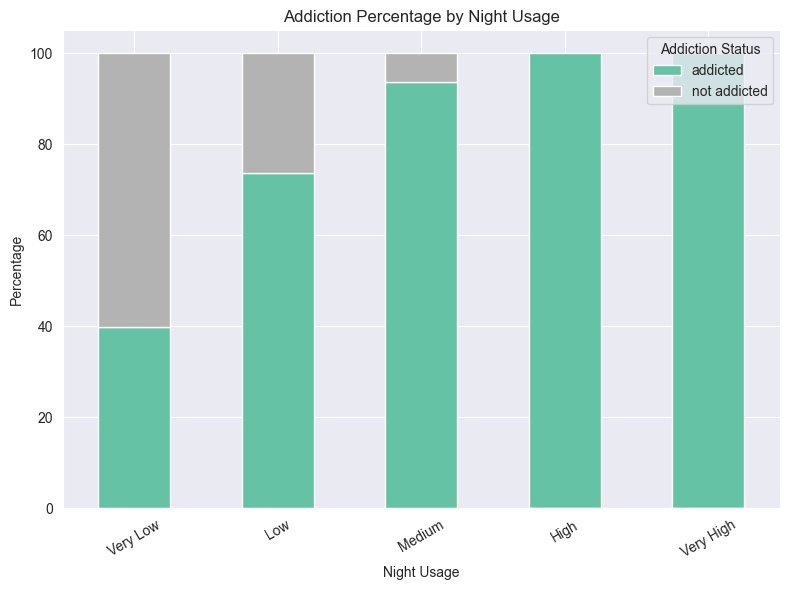

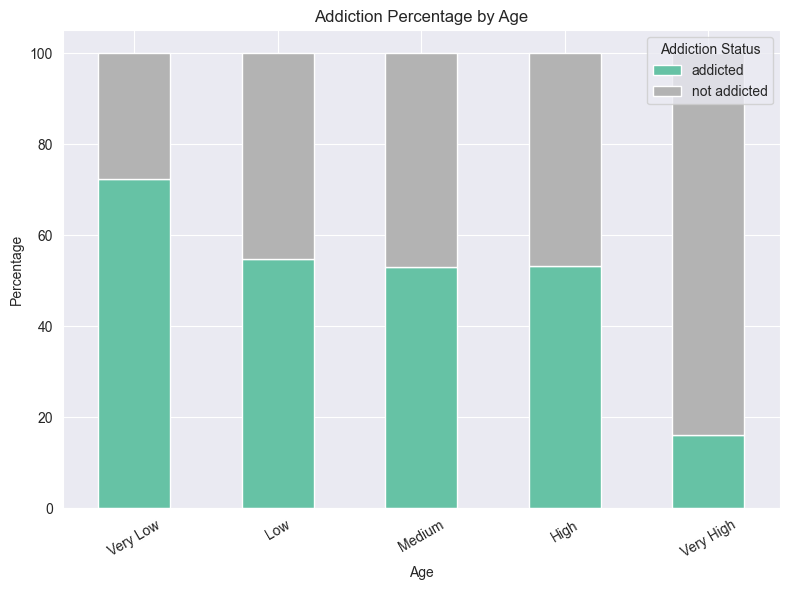

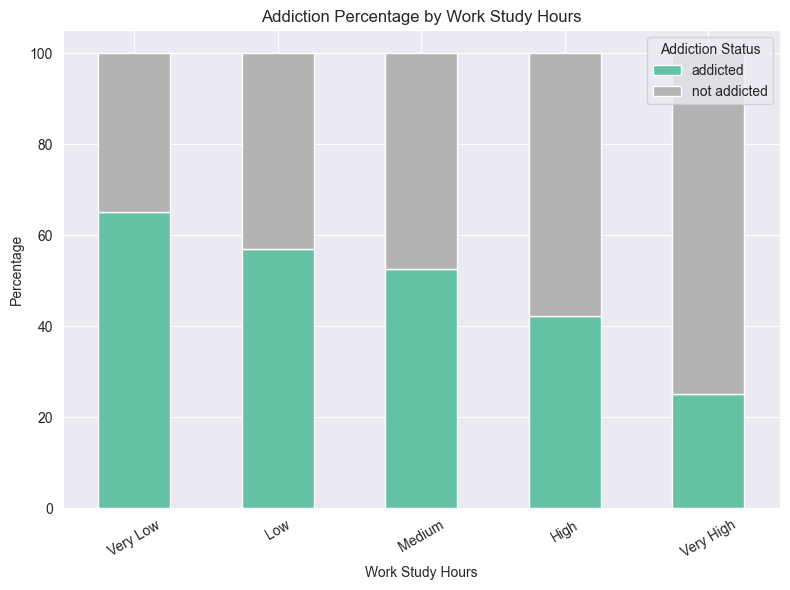

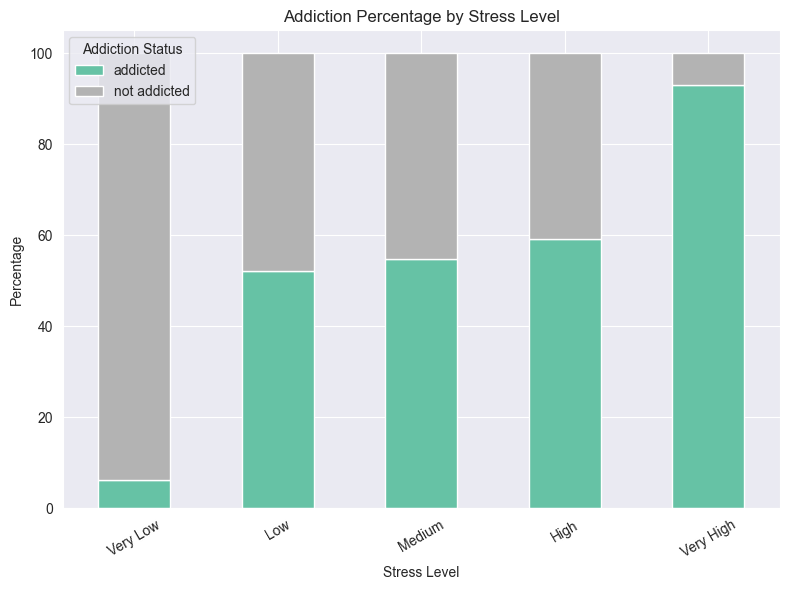

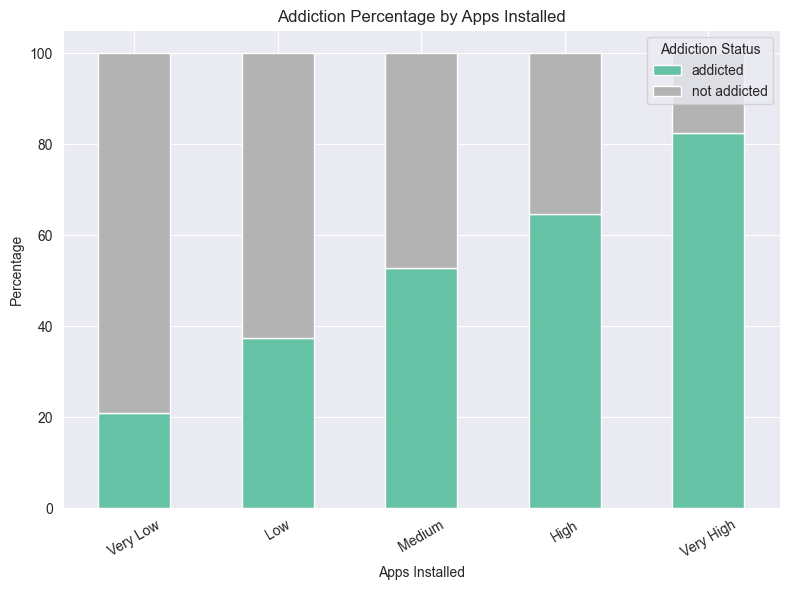

In [60]:
# Loop through each feature
for feature in features:
    binned_col = f'{feature}_binned'

    unique_vals = df[feature].nunique()

    # Choose binning strategy based on value spread
    if unique_vals >= 10:
        # Quantile binning
        bin_edges = pd.qcut(df[feature], q=5, retbins=True, duplicates='drop')[1]
        num_bins = len(bin_edges) - 1
        labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'][:num_bins]
        df[binned_col] = pd.qcut(df[feature], q=num_bins, labels=labels)
    else:
        # Equal-width binning for low-uniqueness features
        df[binned_col] = pd.cut(df[feature], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

    # Group and calculate percentage with observed=True to suppress warnings
    grouped = df.groupby([binned_col, 'addicted'], observed=True).size().reset_index(name='count')
    total_per_bin = grouped.groupby(binned_col, observed=True)['count'].transform('sum')
    grouped['percentage'] = grouped['count'] / total_per_bin * 100

    # Pivot for stacked bar plot
    pivot = grouped.pivot(index=binned_col, columns='addicted', values='percentage').fillna(0)

    # SAFELY rename columns based on presence
    column_map = {0: 'Not Addicted', 1: 'Addicted'}
    pivot.columns = [column_map.get(c, str(c)) for c in pivot.columns]


    # Plot
    pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
    plt.title(f'Addiction Percentage by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Percentage')
    plt.legend(title='Addiction Status')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

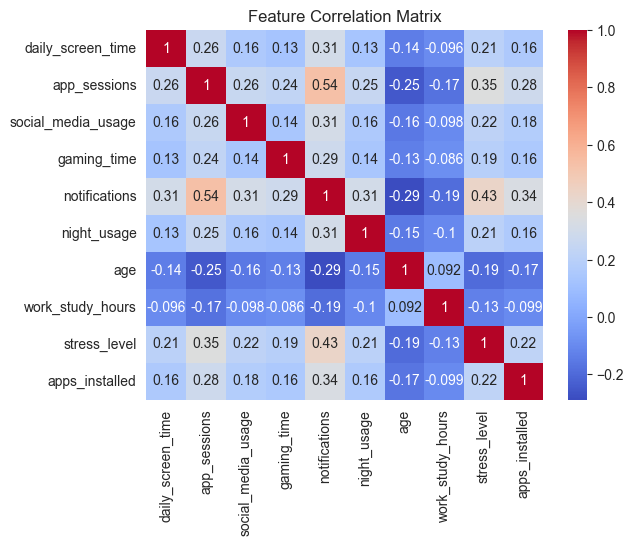

In [61]:
sns.heatmap(df[features].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


*Note:* No features are truly redundant, but some are highly related, social_media_usage, gaming_time, night_usage ⟶ part of daily_screen_time, and app_sessions might correlate with apps_installed

In [62]:
df['addicted'] = df['addicted'].map({'not addicted': 0, 'addicted': 1}).astype(int)

In [63]:
print(df['addicted'].unique())  # Should print: [1 0]

[0 1]


*Addicted column which its values are objects has been encoded to 1 and 0*

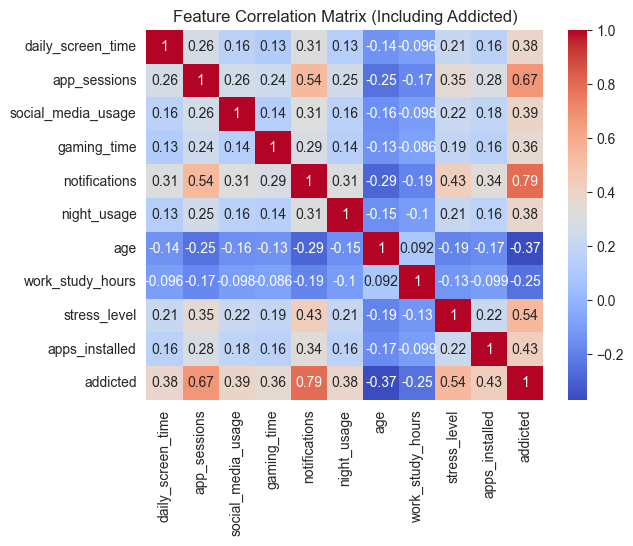

In [64]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix (Including Addicted)")
plt.show()


*Note:* This heat map indicates that there is a correlation with addicted feature and all other features

In [65]:
df.drop_duplicates(inplace=True)

# Models:

###      1- Logistic Regression

In [66]:
df.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,...,daily_screen_time_binned,app_sessions_binned,social_media_usage_binned,gaming_time_binned,notifications_binned,night_usage_binned,age_binned,work_study_hours_binned,stress_level_binned,apps_installed_binned
0,2,29,0,0,49,0,44,5,3,35,...,Very Low,Medium,Very Low,Very Low,Low,Very Low,Very High,Low,Low,Very High
1,6,29,1,2,65,1,29,5,9,21,...,Very High,Medium,Very Low,Low,High,Very Low,Low,Low,Very High,Very Low
2,9,28,2,0,57,3,28,7,5,39,...,Very High,Low,Low,Very Low,Medium,Medium,Low,High,Medium,Very High
3,6,39,2,0,69,1,28,6,8,24,...,Very High,Very High,Low,Very Low,High,Very Low,Low,Medium,Very High,Low
4,5,37,3,1,64,2,27,4,5,26,...,High,High,Medium,Very Low,Medium,Low,Low,Very Low,Medium,Low


In [67]:
# We Work on a copy to avoid modifying the original dataset
df_model = df.copy()

# Encode 'addicted' column (from 'addicted'/'not addicted' to 1/0)
df_model['addicted'] = df_model['addicted'].replace({'addicted': 1, 'not addicted': 0}).astype(int)

# Drop non-numeric columns (like binned categorical features)
df_model = df_model.select_dtypes(include=['number'])


In [68]:
df_model.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,2,29,0,0,49,0,44,5,3,35,0
1,6,29,1,2,65,1,29,5,9,21,1
2,9,28,2,0,57,3,28,7,5,39,1
3,6,39,2,0,69,1,28,6,8,24,1
4,5,37,3,1,64,2,27,4,5,26,1


In [69]:
# Define features and target
X = df_model.drop(columns='addicted')
y = df_model['addicted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*We will scale with standard scaler which produces a distribution centered at 0 with a standard deviation of 1*

In [70]:
# ىScale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Train Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [72]:
# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9808682855040471

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1336
           1       0.98      0.98      0.98      1382

    accuracy                           0.98      2718
   macro avg       0.98      0.98      0.98      2718
weighted avg       0.98      0.98      0.98      2718

Confusion Matrix:
 [[1310   26]
 [  26 1356]]


In [73]:
y_scores = logreg.predict_proba(X_test_scaled)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_scores))


ROC AUC: 0.9981726128062254


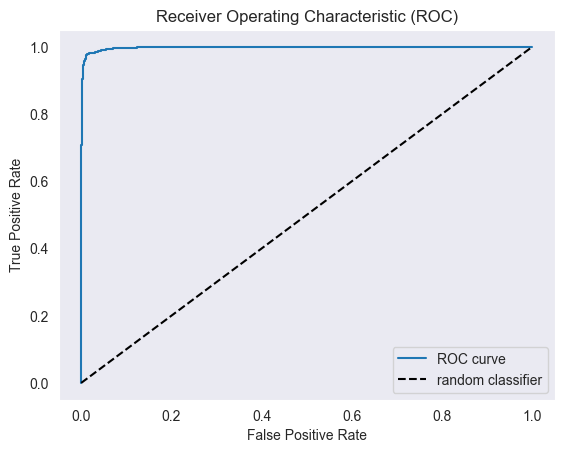

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)   # thresholds that (roc_curve) uses at which calculates fpr & tpr
plt.plot(fpr, tpr, label="ROC curve")         # each point result from different thresholds
                                              # step-like curve not line, sudden changes
                                              # no interpolation (not a smooth curve)
plt.plot([0, 1], [0, 1], 'k--', label="random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid()
plt.show()

*Logistic Regression Performance
Accuracy: 98%
Precision & Recall (both classes): 98%
Confusion Matrix: Only 26 false positives and 26 false negatives out of 2718 samples.
ROC AUC: Very close to 1*



###      2- KNN (K-Nearest Neighbors)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [76]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9797645327446652

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1336
           1       0.98      0.98      0.98      1382

    accuracy                           0.98      2718
   macro avg       0.98      0.98      0.98      2718
weighted avg       0.98      0.98      0.98      2718

Confusion Matrix:
 [[1314   22]
 [  33 1349]]


In [77]:
y_scores = logreg.predict_proba(X_test_scaled)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_scores))

ROC AUC: 0.9981726128062254


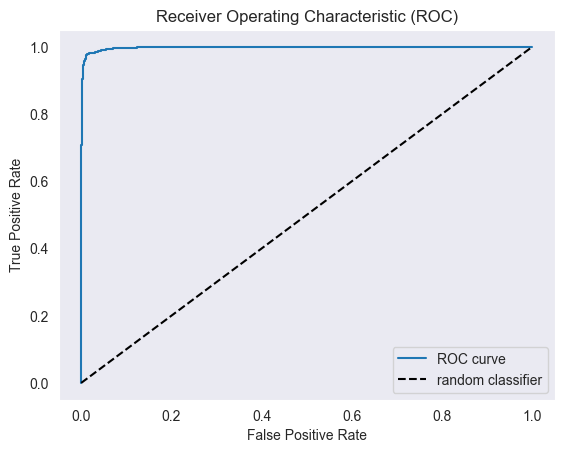

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)   # thresholds that (roc_curve) uses at which calculates fpr & tpr
plt.plot(fpr, tpr, label="ROC curve")         # each point result from different thresholds
                                              # step-like curve not line, sudden changes
                                              # no interpolation (not a smooth curve)
plt.plot([0, 1], [0, 1], 'k--', label="random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid()
plt.show()

*KNN Performance (slightly worse than logistic regression)
Accuracy: 97.98%
Precision & Recall (both classes): 98%
ROC AUC: Very close to 1*

###      3- Random Forest Classifier

In [79]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9808682855040471

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1336
           1       0.98      0.98      0.98      1382

    accuracy                           0.98      2718
   macro avg       0.98      0.98      0.98      2718
weighted avg       0.98      0.98      0.98      2718

Confusion Matrix:
 [[1311   25]
 [  27 1355]]


In [81]:
y_scores = rf.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_scores))

ROC AUC: 0.9977804882275969


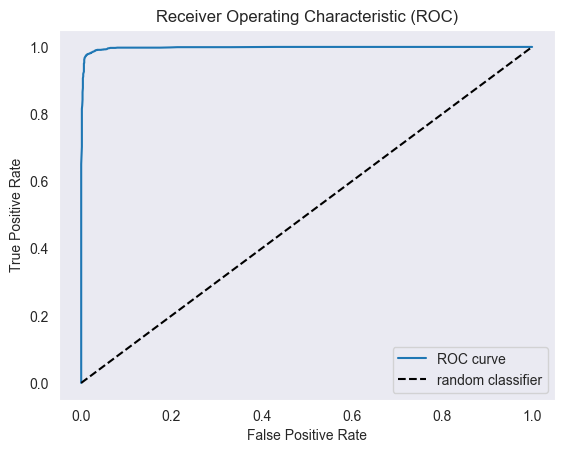

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)   # thresholds that (roc_curve) uses at which calculates fpr & tpr
plt.plot(fpr, tpr, label="ROC curve")         # each point result from different thresholds
                                              # step-like curve not line, sudden changes
                                              # no interpolation (not a smooth curve)
plt.plot([0, 1], [0, 1], 'k--', label="random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid()
plt.show()

Note: We're using the unscaled X_train and X_test because tree-based models like Random Forest don’t require feature scaling.

*Accuracy: 98.09% (very slightly better than Logistic Regression)
ROC AUC: 0.998 → significantly higher than Logistic Regression (better probability calibration)
Precision/Recall/F1: 98% for both classes
Confusion Matrix: 25 false positives and 27 false negatives*

In [83]:
from tpot import TPOTRegressor


tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit TPOT model
tpot.fit(X_train, y_train)

# Evaluate on test set
print("Test Score:", tpot.score(X_test, y_test))

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01645218848543089

Generation 2 - Current best internal CV score: -0.01645218848543089

Generation 3 - Current best internal CV score: -0.01645218848543089

Generation 4 - Current best internal CV score: -0.01645218848543089

Generation 5 - Current best internal CV score: -0.016389926110388094

Best pipeline: XGBRegressor(RidgeCV(input_matrix), learning_rate=0.1, max_depth=6, min_child_weight=19, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8, verbosity=0)
Test Score: -0.01261666966352296


C:\Users\tarok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



In [84]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Base model
ridge = make_pipeline(StandardScaler(), RidgeCV())

# Final estimator
xgb = XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=19,
    n_estimators=100,
    n_jobs=1,
    objective='reg:squarederror',
    subsample=0.8,
    verbosity=0
)

# Stacking pipeline
model = StackingRegressor(
    estimators=[('ridge', ridge)],
    final_estimator=xgb,
    passthrough=False,  # Set True if you want XGB to also see the original features
    n_jobs=1
)


In [85]:
model.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9808682855040471

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1336
           1       0.98      0.98      0.98      1382

    accuracy                           0.98      2718
   macro avg       0.98      0.98      0.98      2718
weighted avg       0.98      0.98      0.98      2718

Confusion Matrix:
 [[1311   25]
 [  27 1355]]


*It gives us the same accuracy, Precision, Recall and F1 as the Random Forest Classifier*

In [88]:
import joblib
# Save the trained model to a file
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [89]:
# Save the trained model to a file
joblib.dump(model, 'XGBRegressor.pkl')

['XGBRegressor.pkl']